In [2]:
import pandas as pd

transactions = pd.read_csv('transactions.csv', parse_dates = ["date"])

transaction_44 = transactions.loc[transactions["store_nbr"] == 44, ["date", "transactions"]]
transaction_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


In [3]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

array([[<Axes: xlabel='Date', ylabel='Daily Transactions'>,
        <Axes: xlabel='Date', ylabel='Daily Transactions'>]], dtype=object)

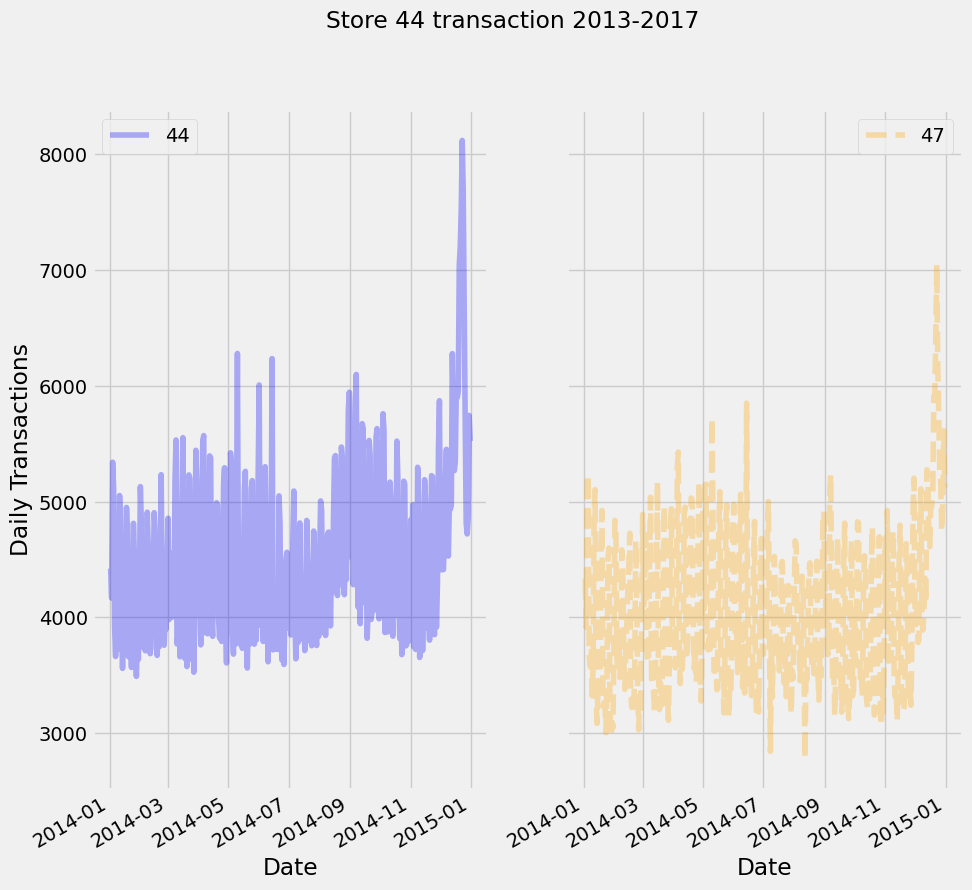

In [4]:
(transactions
.query("store_nbr in [44, 47] and date.dt.year == 2014")
.pivot(index="date", columns = "store_nbr")
.droplevel(0, axis = 1)
.plot(
    title = "Store 44 transaction 2013-2017",
    xlabel = "Date",
    ylabel = "Daily Transactions",
    color=["blue", "orange"],
    alpha=.3,
    style = ["-", "--"],
    subplots=True,
    layout=(1, 2),
    sharey=True,
    figsize=(10, 10),
     )
)

In [14]:
store_40s = list(range(40, 50))

(transactions
    .query('store_nbr in @store_40s and date.dt.month in [1, 2, 3]')
    .pivot_table(index=transactions["date"].dt.month,
                columns=transactions["store_nbr"],
                values="transactions",
                aggfunc="sum",)
)#.plot.bar().legend(bbox_to_anchor=(1, 1))

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071


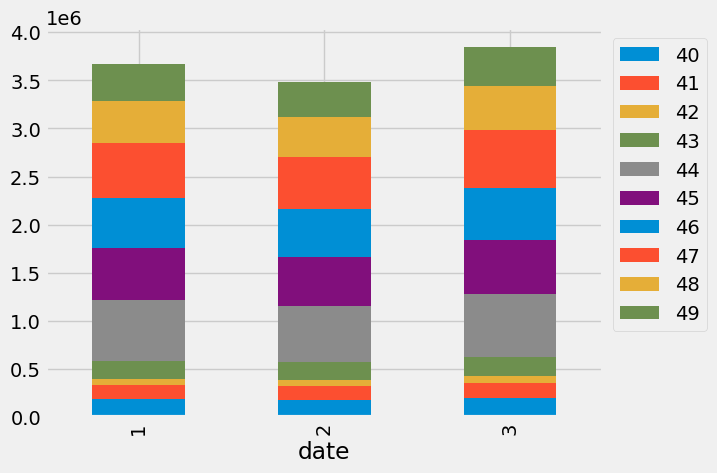

In [13]:
store_40s = list(range(40, 50))

(transactions
    .query('store_nbr in @store_40s and date.dt.month in [1, 2, 3]')
    .pivot_table(index=transactions["date"].dt.month,
                columns=transactions["store_nbr"],
                values="transactions",
                aggfunc="sum",)
).plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))

In [18]:
store_40s = list(range(40, 50))

(transactions
    .query('store_nbr in @store_40s and date.dt.month in [1, 2, 3]')
    .pivot_table(index=transactions["date"].dt.month,
                columns=transactions["store_nbr"],
                values="transactions",
                aggfunc="sum").apply(lambda x: x * 100 /  sum(x), axis=1)
)#.plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,5.052344,4.042938,1.763867,5.138606,17.117285,14.664028,14.238927,15.493529,11.958631,10.529844
2,5.143092,4.116339,1.790748,5.365099,16.760887,14.676416,14.150929,15.481162,12.115043,10.400287
3,5.194765,4.062374,1.760438,5.299201,17.045413,14.589956,14.046847,15.449572,11.968187,10.583246
